## Load Data (With Cleaning)

In [2]:
from scratch_regression import load_gdsc, prepare_features, split_data
excluded_columns = ['LN_IC50', 'AUC', 'Z_SCORE', 'DRUG_ID', 'COSMIC_ID', 'DRUG_NAME', 'CELL_LINE_NAME']
df = load_gdsc()

## Regression with Packages

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression as SKLinearReg
from sklearn.tree import DecisionTreeRegressor as SKTreeReg
from sklearn.ensemble import RandomForestRegressor as SKForestReg
from sklearn.ensemble import GradientBoostingRegressor as SKGBReg

In [6]:
target = 'LN_IC50'
test_size = 0.2
random_state = 42


X_dummy, y = prepare_features(df, encode_dummies=True)
X_label, _ = prepare_features(df, encode_dummies=False)
Xd_tr, Xd_te, Xl_tr, Xl_te, y_tr, y_te = split_data(X_dummy, X_label, y)


In [15]:
# Initialize models
dummy_models = {
    "Linear Regression": SKLinearReg(),
}
tree_models = {
    "Decision Tree": SKTreeReg(max_depth=3, min_samples_split=2),
    "Random Forest": SKForestReg(n_estimators=200, random_state=random_state),
    "Gradient Boosting": SKGBReg(n_estimators=200, learning_rate=0.2, random_state=random_state),
}
results = {}

for name, model in dummy_models.items():
    # Train
    model.fit(Xd_tr, y_tr)
    # Predict
    y_pred = model.predict(Xd_te)
    # Evaluate
    mse = mean_squared_error(y_te, y_pred)
    r2 = r2_score(y_te, y_pred)
    results[name] = {"MSE": mse, "R^2": r2}
    print(f"{name} - MSE: {mse:.4f}, R^2: {r2:.4f}")
for name, model in tree_models.items():
    # Train
    model.fit(Xl_tr, y_tr)
    # Predict
    y_pred = model.predict(Xl_te)
    # Evaluate
    mse = mean_squared_error(y_te, y_pred)
    r2 = r2_score(y_te, y_pred)
    results[name] = {"MSE": mse, "R^2": r2}
    print(f"{name} - MSE: {mse:.4f}, R^2: {r2:.4f}")


Linear Regression - MSE: 2.0986, R^2: 0.7024
Decision Tree - MSE: 5.6137, R^2: 0.2040
Random Forest - MSE: 2.0713, R^2: 0.7063
Gradient Boosting - MSE: 2.1917, R^2: 0.6892


## Regression from Scratch

In [7]:
from scratch_regression import LinearRegressionScratch, DecisionTreeRegressorScratch, RandomForestRegressorScratch, GradientBoostingRegressorScratch, visualize_results

In [17]:
scratch_dummy_models = {
    "Linear Regression": LinearRegressionScratch(),
}
scratch_tree_models = {
    "Decision Tree": DecisionTreeRegressorScratch(max_depth=3, min_samples_split=2),
    "Random Forest": RandomForestRegressorScratch(n_estimators=200, random_state=random_state),
    "Gradient Boosting": GradientBoostingRegressorScratch(n_estimators=200, learning_rate=0.2, random_state=random_state),
}
for name, model in scratch_dummy_models.items():
    # Train
    model.fit(Xd_tr, y_tr)
    # Predict
    y_pred = model.predict(Xd_te)
    # Evaluate
    mse = mean_squared_error(y_te, y_pred)
    r2 = r2_score(y_te, y_pred)
    results[name] = {"MSE": mse, "R^2": r2}
    print(f"{name} - MSE: {mse:.4f}, R^2: {r2:.4f}")
for name, model in scratch_tree_models.items():
    # Train
    model.fit(Xl_tr, y_tr)
    # Predict
    y_pred = model.predict(Xl_te)
    # Evaluate
    mse = mean_squared_error(y_te, y_pred)
    r2 = r2_score(y_te, y_pred)
    results[name] = {"MSE": mse, "R^2": r2}
    print(f"{name} - MSE: {mse:.4f}, R^2: {r2:.4f}")

Linear Regression - MSE: 2.0981, R^2: 0.7025
Decision Tree - MSE: 5.6137, R^2: 0.2040
Random Forest - MSE: 3.5050, R^2: 0.5030
Gradient Boosting - MSE: 2.1917, R^2: 0.6892


## Visualization

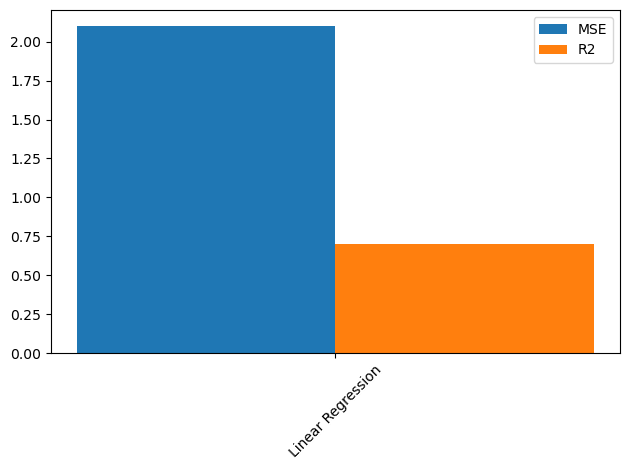

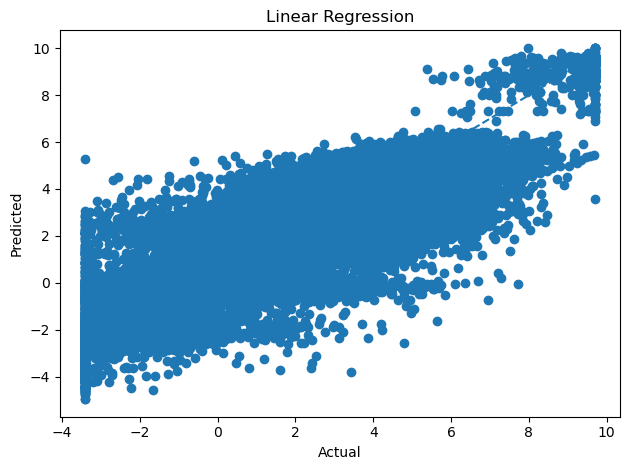

In [19]:
visualize_results(dummy_models, Xd_te, y_te)

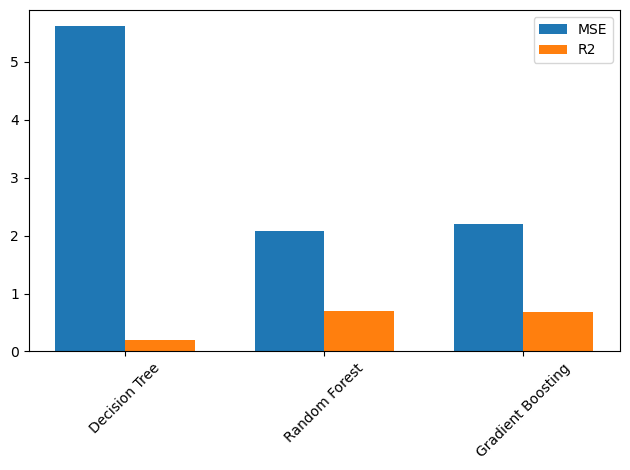

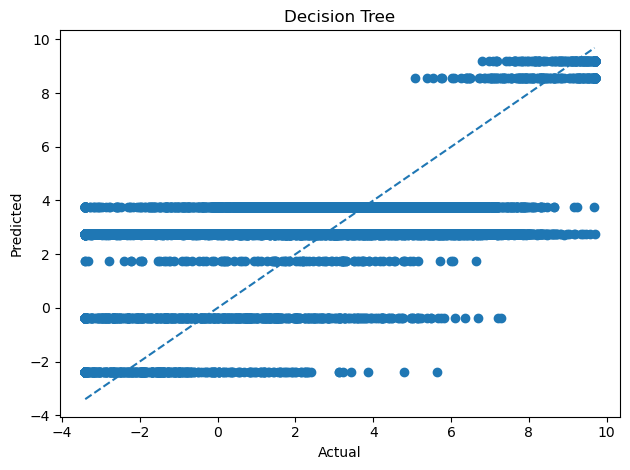

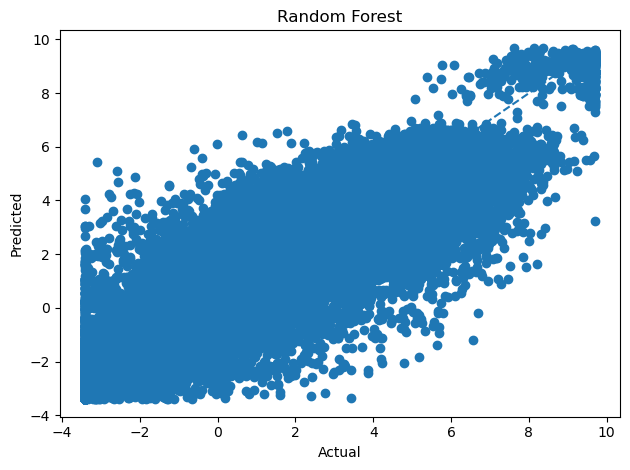

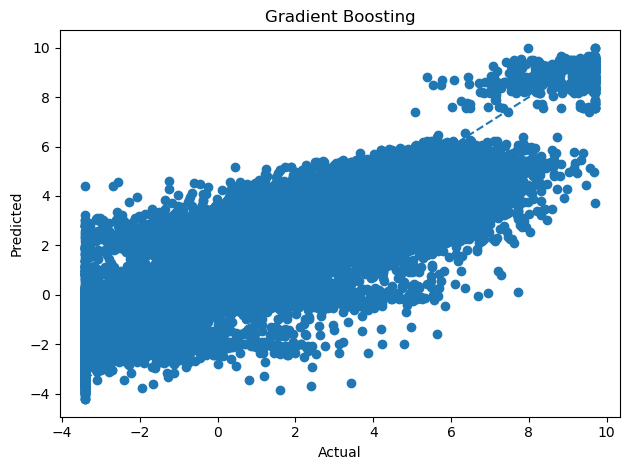

In [16]:
visualize_results(tree_models, Xl_te, y_te)